In [8]:
import os, sys
sys.path.append('/Users/bbrzycki/Documents/Personal/Evolution-Code/Code/blossom')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from blossom import *

In [2]:
organism_list = DatasetIO.load_organism_dataset('datasets/organisms_ds0010.txt')
organism_list

[<organism.Organism at 0x105e592b0>, <organism.Organism at 0x105e594e0>]

In [3]:
organism_list_vars = [vars(organism) for organism in organism_list]
organism_list_vars

[{'organism_id': '393e32c5-94e2-4d96-8387-74be0556318e',
  'dna': '0000',
  'age': 10,
  'alive': True,
  'position': [7],
  'sex': None,
  'water_current': None,
  'food_current': None,
  'species_name': 'species1',
  'movement_type': 'simple_random',
  'reproduction_type': 'pure_replication',
  'drinking_type': None,
  'eating_type': None,
  'action_type': 'move_only',
  'dna_length': 4,
  'max_age': 15,
  'max_time_without_food': None,
  'max_time_without_water': None,
  'mutation_rate': None,
  'food_capacity': None,
  'food_initial': None,
  'food_metabolism': None,
  'food_intake': None,
  'water_capacity': None,
  'water_initial': None,
  'water_metabolism': None,
  'water_intake': None},
 {'organism_id': '17b231e0-f277-4130-a9e2-720c9665d87a',
  'dna': '0000',
  'age': 10,
  'alive': True,
  'position': [5],
  'sex': None,
  'water_current': None,
  'food_current': None,
  'species_name': 'species1',
  'movement_type': 'simple_random',
  'reproduction_type': 'pure_replication',

In [4]:
organism_ids = [organism.organism_id for organism in organism_list]
organism_ids

['393e32c5-94e2-4d96-8387-74be0556318e',
 '17b231e0-f277-4130-a9e2-720c9665d87a']

In [5]:
positions = [organism.position for organism in organism_list]
positions

[[7], [5]]

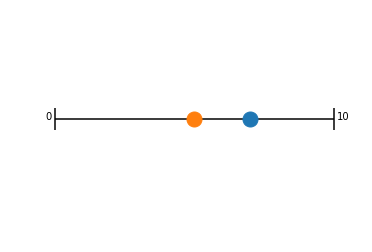

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1,11)
ax.set_ylim(0,10)

# draw lines
xmin = 0
xmax = 10
y = 5
height = 1

plt.hlines(y, xmin, xmax)
plt.vlines(xmin, y - height / 2., y + height / 2.)
plt.vlines(xmax, y - height / 2., y + height / 2.)

# draw a point on the line
x = 4
for position in positions:
    plt.plot(position,y, 'o', ms = 15)


# add numbers
plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
plt.text(xmax + 0.1, y, '10', horizontalalignment='left')

plt.axis('off')
plt.savefig('test.pdf', bbox_inches='tight')
plt.show()

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]]


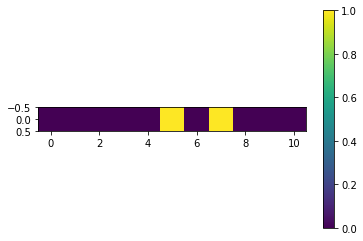

In [18]:
import numpy as np

weights = np.zeros(11)
for position in positions:
    index = position[0]
    weights[index] += 1
print(weights)
print(weights[np.newaxis,:])

plt.imshow(weights[np.newaxis,:])
plt.colorbar()

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


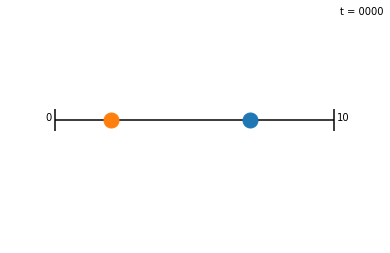

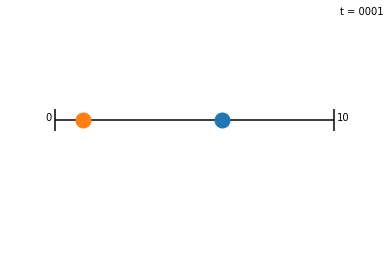

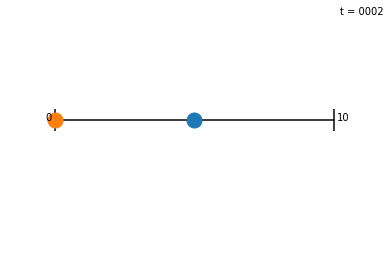

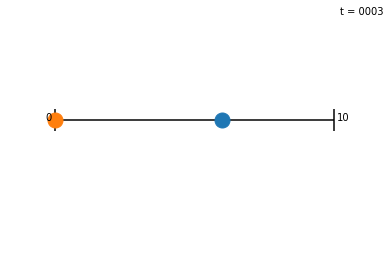

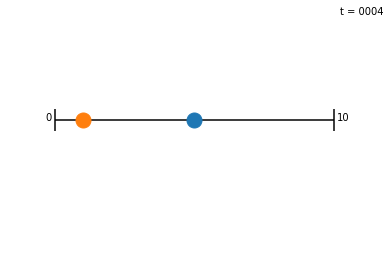

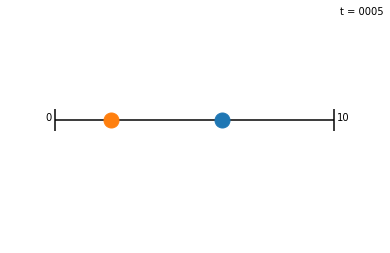

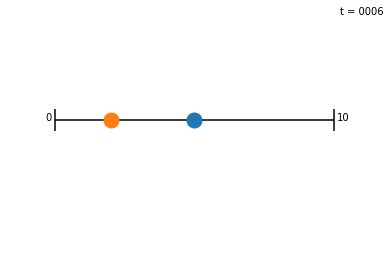

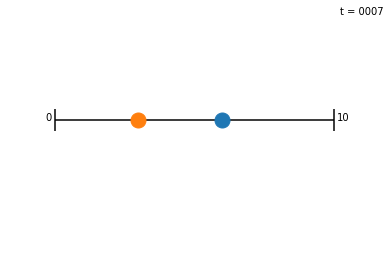

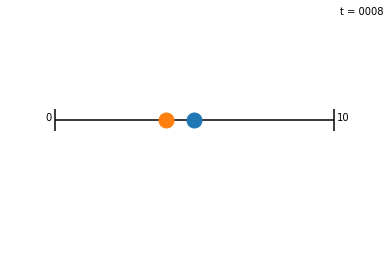

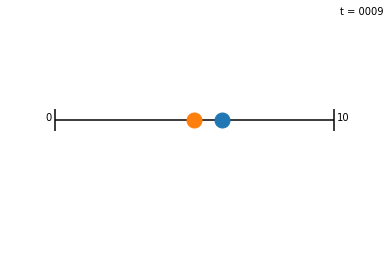

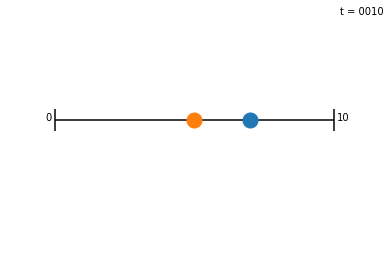

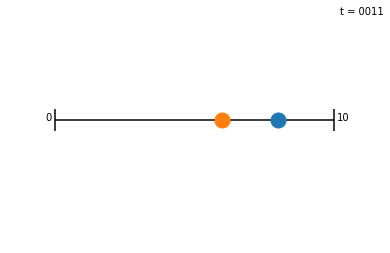

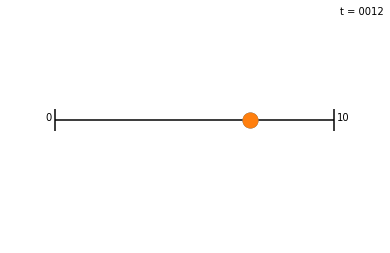

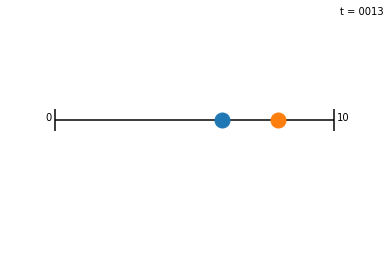

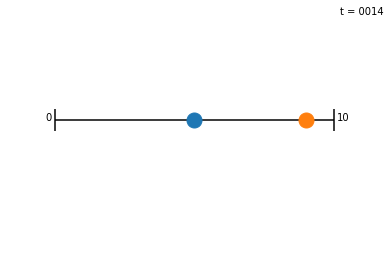

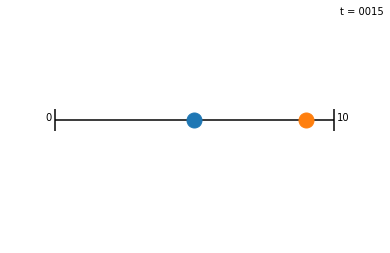

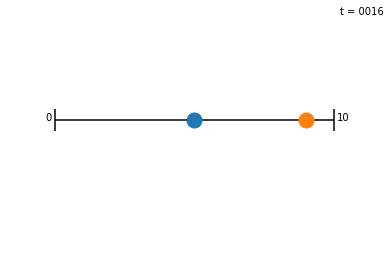

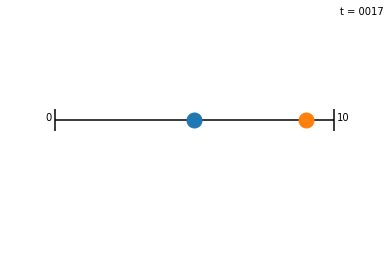

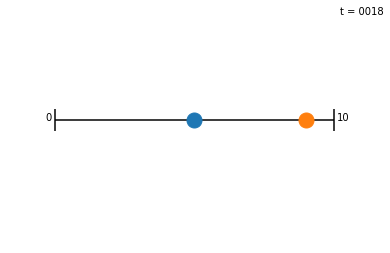

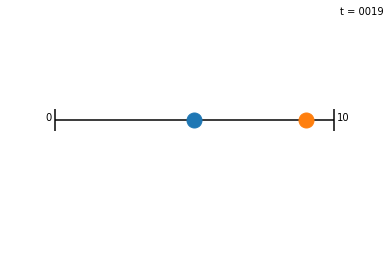

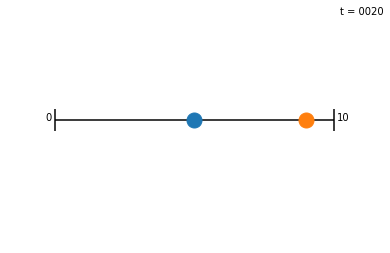

In [54]:
for i in range(21):
    organism_list = DatasetIO.load_organism_dataset('datasets/organisms_ds%04d.txt' % i)
    
    # set up the figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(-1,11)
    ax.set_ylim(0,10)

    # draw lines
    xmin = 0
    xmax = 10
    y = 5
    height = 1

    plt.hlines(y, xmin, xmax)
    plt.vlines(xmin, y - height / 2., y + height / 2.)
    plt.vlines(xmax, y - height / 2., y + height / 2.)

    # draw a point on the line
    for organism in organism_list:
        plt.plot(organism.position,y, 'o', ms = 15)

    plt.text(1, 1,'t = %04d' % i, horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

    # add numbers
    plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
    plt.text(xmax + 0.1, y, '10', horizontalalignment='left')

    plt.axis('off')
    plt.savefig('images/1D_ds%04d.png' % i, bbox_inches='tight')
    # plt.show()

In [63]:
try:
    os.remove('images/movie.mp4')
except OSError:
    pass
os.system("ffmpeg -r 1 -pattern_type glob -i 'images/1D_ds????.png' -c:v libx264 -vf 'fps=25,scale=trunc(iw/2)*2:trunc(ih/2)*2' -pix_fmt yuv420p images/movie.mp4")

0

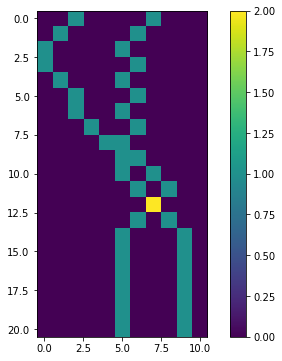

In [20]:
image = []
for i in range(21):
    organism_list = DatasetIO.load_organism_dataset('datasets/organisms_ds%04d.txt' % i)
    
    positions = [organism.position for organism in organism_list]

    weights = np.zeros(11)
    for position in positions:
        index = position[0]
        weights[index] += 1
        
    image.append(weights)

# plt.imshow(weights[np.newaxis,:])
fig = plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.colorbar()

In [6]:
time = 256
size = 63

image = []
for i in range(time + 1):
    organism_list = DatasetIO.load_organism_dataset('/Users/bbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/org256_world64_time100/organisms_ds%04d.txt' % i)
    
    positions = [organism.position for organism in organism_list]

    weights = np.zeros(size + 1)
    for position in positions:
        index = position[0]
        weights[index] += 1
        
    image.append(weights)

# plt.imshow(weights[np.newaxis,:])
fig = plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/org256_world64_time100/organisms_ds0000.txt'

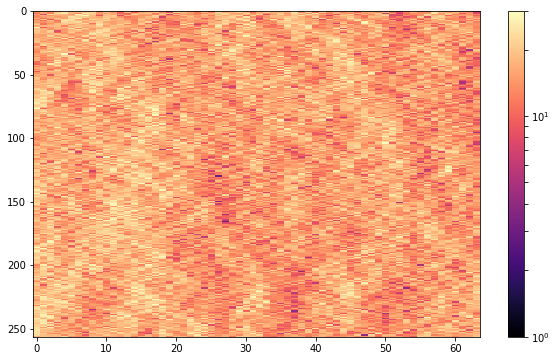

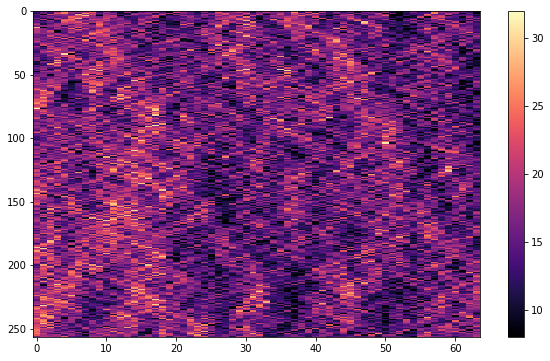

In [53]:
import matplotlib
from matplotlib.colors import LogNorm 

fig = plt.figure(figsize=(10, 6))
plt.imshow(image, aspect='auto', cmap='magma', norm=LogNorm(vmin=1, vmax=30))
plt.colorbar()

fig = plt.figure(figsize=(10, 6))
plt.imshow(image, aspect='auto', cmap='magma', vmin=8, vmax=32)
plt.colorbar()

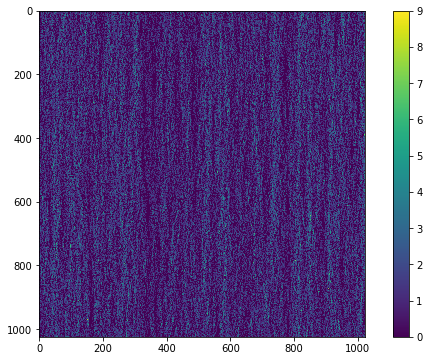

In [9]:
time = 1024
size = 1023

image = []
for i in range(time + 1):
    organism_list = DatasetIO.load_organism_dataset('/Users/bbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/org1024_world1024_time1024/organisms_ds%04d.txt' % i)
    
    positions = [organism.position for organism in organism_list]

    weights = np.zeros(size + 1)
    for position in positions:
        index = position[0]
        weights[index] += 1
        
    image.append(weights)

# plt.imshow(weights[np.newaxis,:])
fig = plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.colorbar()

(-0.5, 1023.5, 1024.5, -0.5)

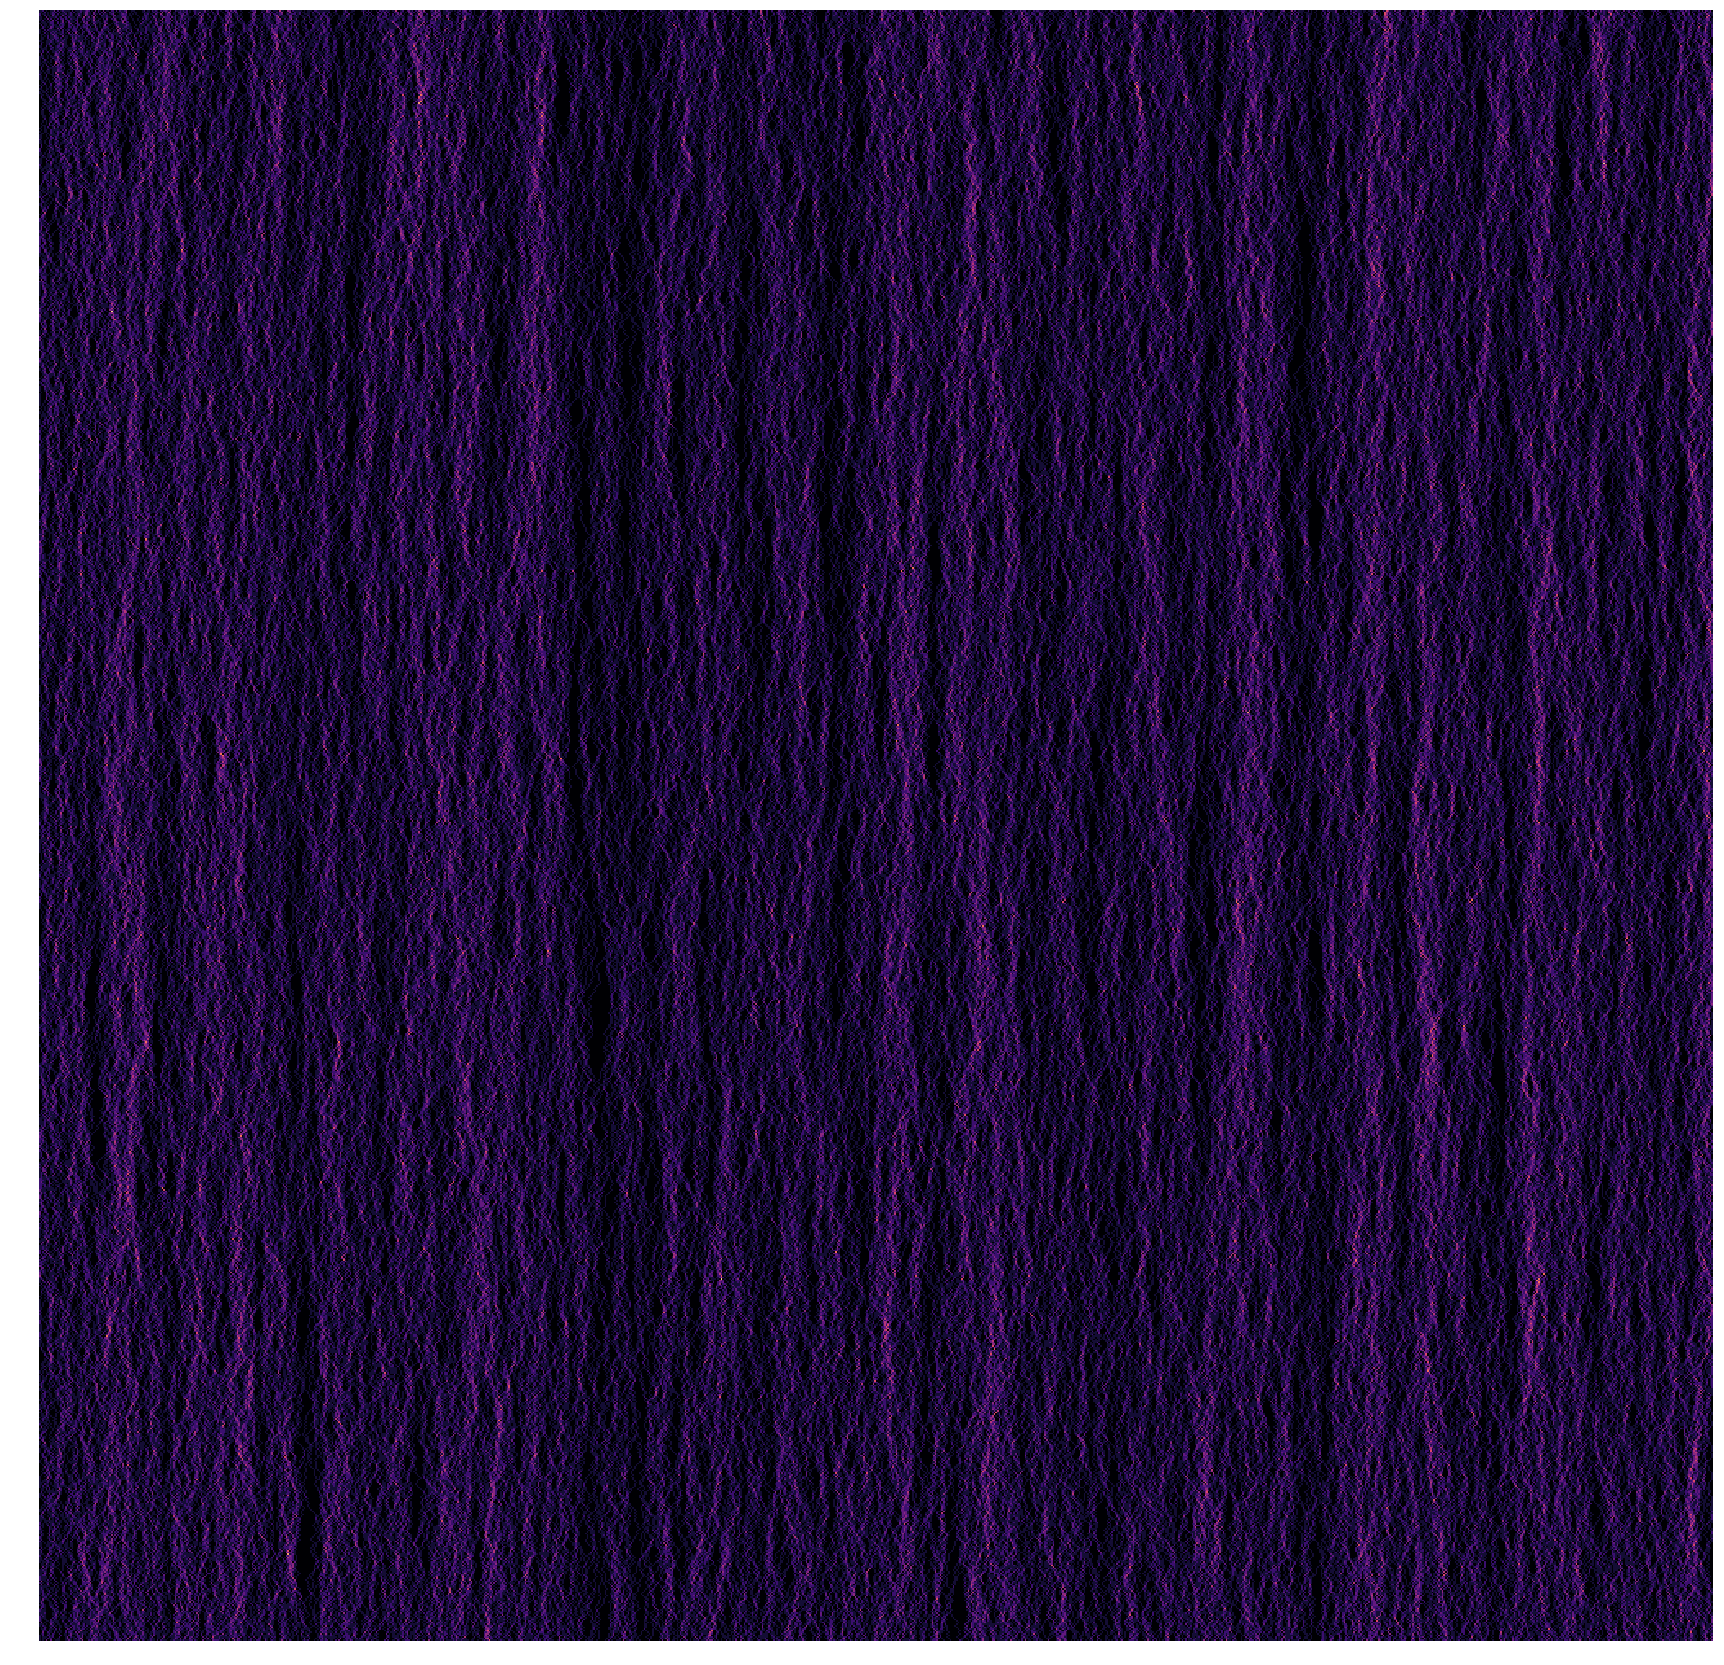

In [63]:
fig = plt.figure(figsize=(30, 30))
plt.imshow(image, aspect='auto', cmap='magma', vmin=0, vmax=10)
plt.axis('off')

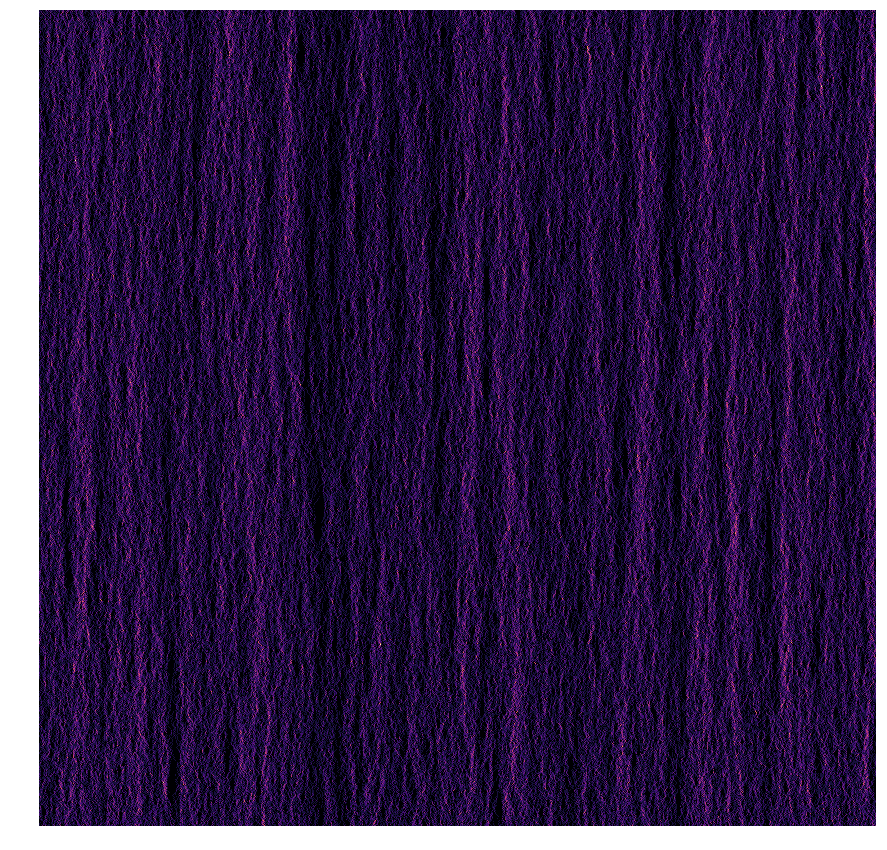

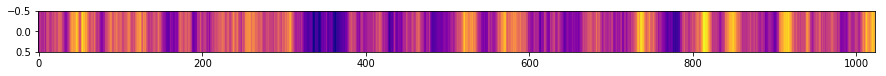

In [121]:
plt.close('all')

size = 15

fig = plt.figure(figsize=(size, size))
plt.imshow(image, aspect='auto', cmap='magma')
plt.axis('off')
plt.imsave('test.png', image, cmap='magma')

fig = plt.figure(figsize=(size, size/20.))
plt.imshow(np.mean(np.array(image), axis=0)[np.newaxis,:], aspect='auto', cmap='plasma')

In [85]:
np.array(image).shape

(1025, 1024)

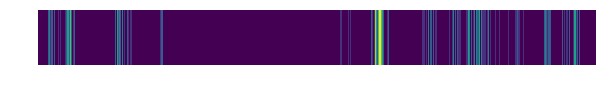

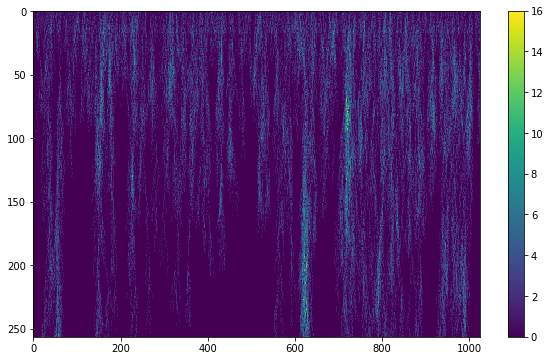

In [81]:
time = 256
size = 1024

image = []
for i in range(time + 1):
    organism_list = DatasetIO.load_organism_dataset('/Users/bbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_replication/organisms_ds%04d.txt' % i)
    
    positions = [organism.position for organism in organism_list]

    weights = np.zeros(size)
    for position in positions:
        index = position[0]
        weights[index] += 1
        
    plt.close('all')
    fig = plt.figure(figsize=(10, 1))
    plt.imshow(weights[np.newaxis,:], aspect='auto')
    plt.axis('off')
    plt.savefig('images/replication/organisms_ds%04d.png' % i, bbox_inches='tight')
        
    image.append(weights)

# plt.imshow(weights[np.newaxis,:])
fig = plt.figure(figsize=(10, 6))
plt.imshow(image, aspect='auto')
plt.colorbar()

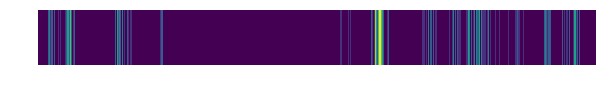

In [79]:
fig = plt.figure(figsize=(10, 1))
plt.imshow(weights[np.newaxis,:], aspect='auto')
plt.axis('off')
plt.savefig('test1.png', bbox_inches='tight')

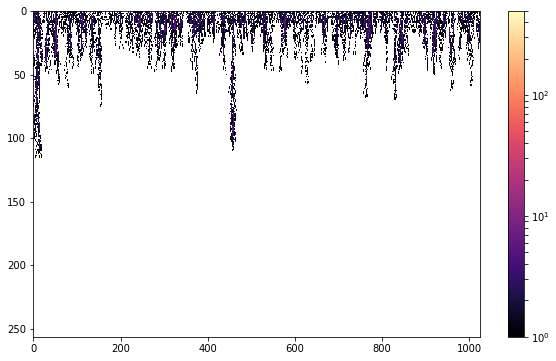

In [34]:
import matplotlib
from matplotlib.colors import LogNorm 

fig = plt.figure(figsize=(10, 6))
plt.imshow(image, aspect='auto', cmap='magma', norm=LogNorm(vmin=1, vmax=500))
plt.colorbar()

Text(0,0.5,'Time')

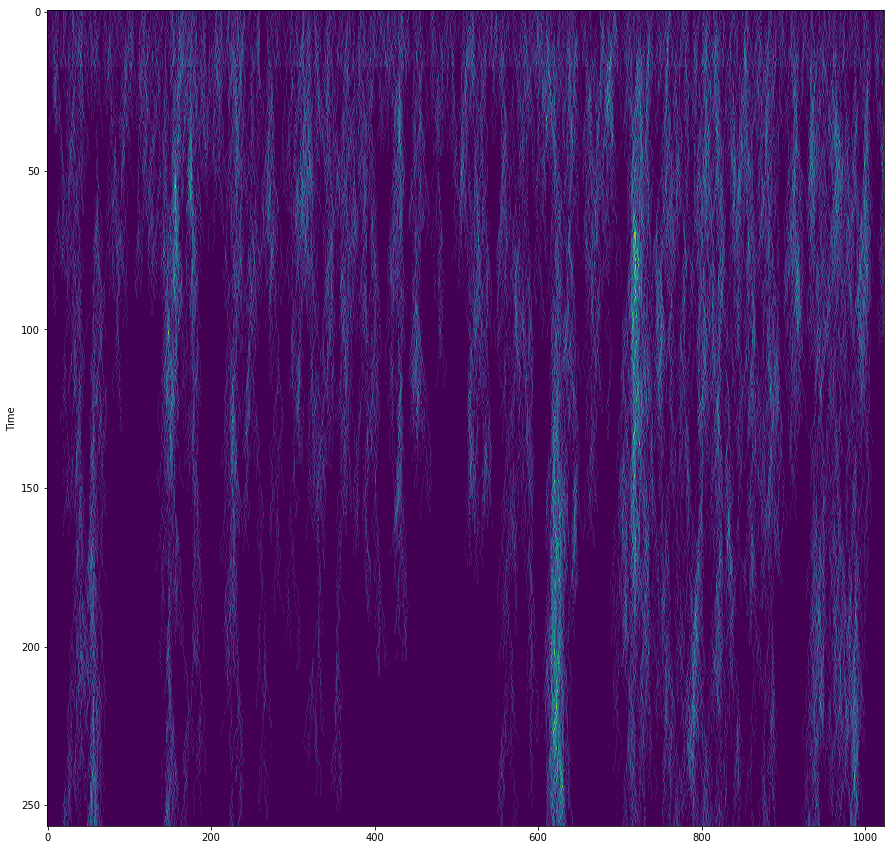

In [61]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(image, aspect='auto', cmap='viridis')
# plt.axis('off')
plt.ylabel('Time')

In [99]:
os.system("ffmpeg -r 10 -pattern_type glob -i 'images/replication/organisms_ds????.png' -c:v libx264 -vf 'fps=25,scale=trunc(iw/2)*2:trunc(ih/2)*2' -pix_fmt yuv420p images/2d_movie.mp4")

0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256


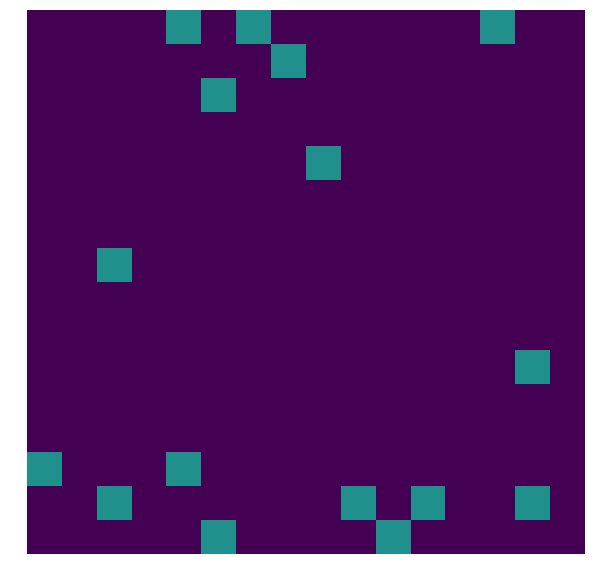

In [96]:
time = 256
size = (16, 16)

for i in range(time + 1):
    print(i)
    organism_list = DatasetIO.load_organism_dataset('/Users/bbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_replication/organisms_ds%04d.txt' % i)
    
    positions = [organism.position for organism in organism_list]

    weights = np.zeros(size)
    for position in positions:
        weights[position[0]][position[1]] += 1
        
    plt.close('all')
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(weights, aspect='auto', vmin=0, vmax=2)
#     plt.colorbar()
#     plt.imshow(weights, aspect='auto', vmin=0, vmax=16)
    plt.axis('off')
    plt.savefig('images/replication/organisms_ds%04d.png' % i, bbox_inches='tight')